In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as T

torch.manual_seed(42)
transform = T.Compose([T.ToTensor(), T.Normalize([0.5], [0.5])])


In [2]:
train_set = torchvision.datasets.FashionMNIST(
    root=".",
    train=True,
    download=True,
    transform=transform
)
test_set = torchvision.datasets.FashionMNIST(root=".",train=False,download=True,transform=transform)

In [3]:
print(train_set[0])

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -

In [4]:
text_labels = [
    "t-shirt",
    "trouser",
    "pullover",
    "dress",
    "coat",
    "sandal",
    "shirt",
    "sneaker",
    "bag",
    "ankle boot",
]


In [5]:
import matplotlib.pyplot as plt

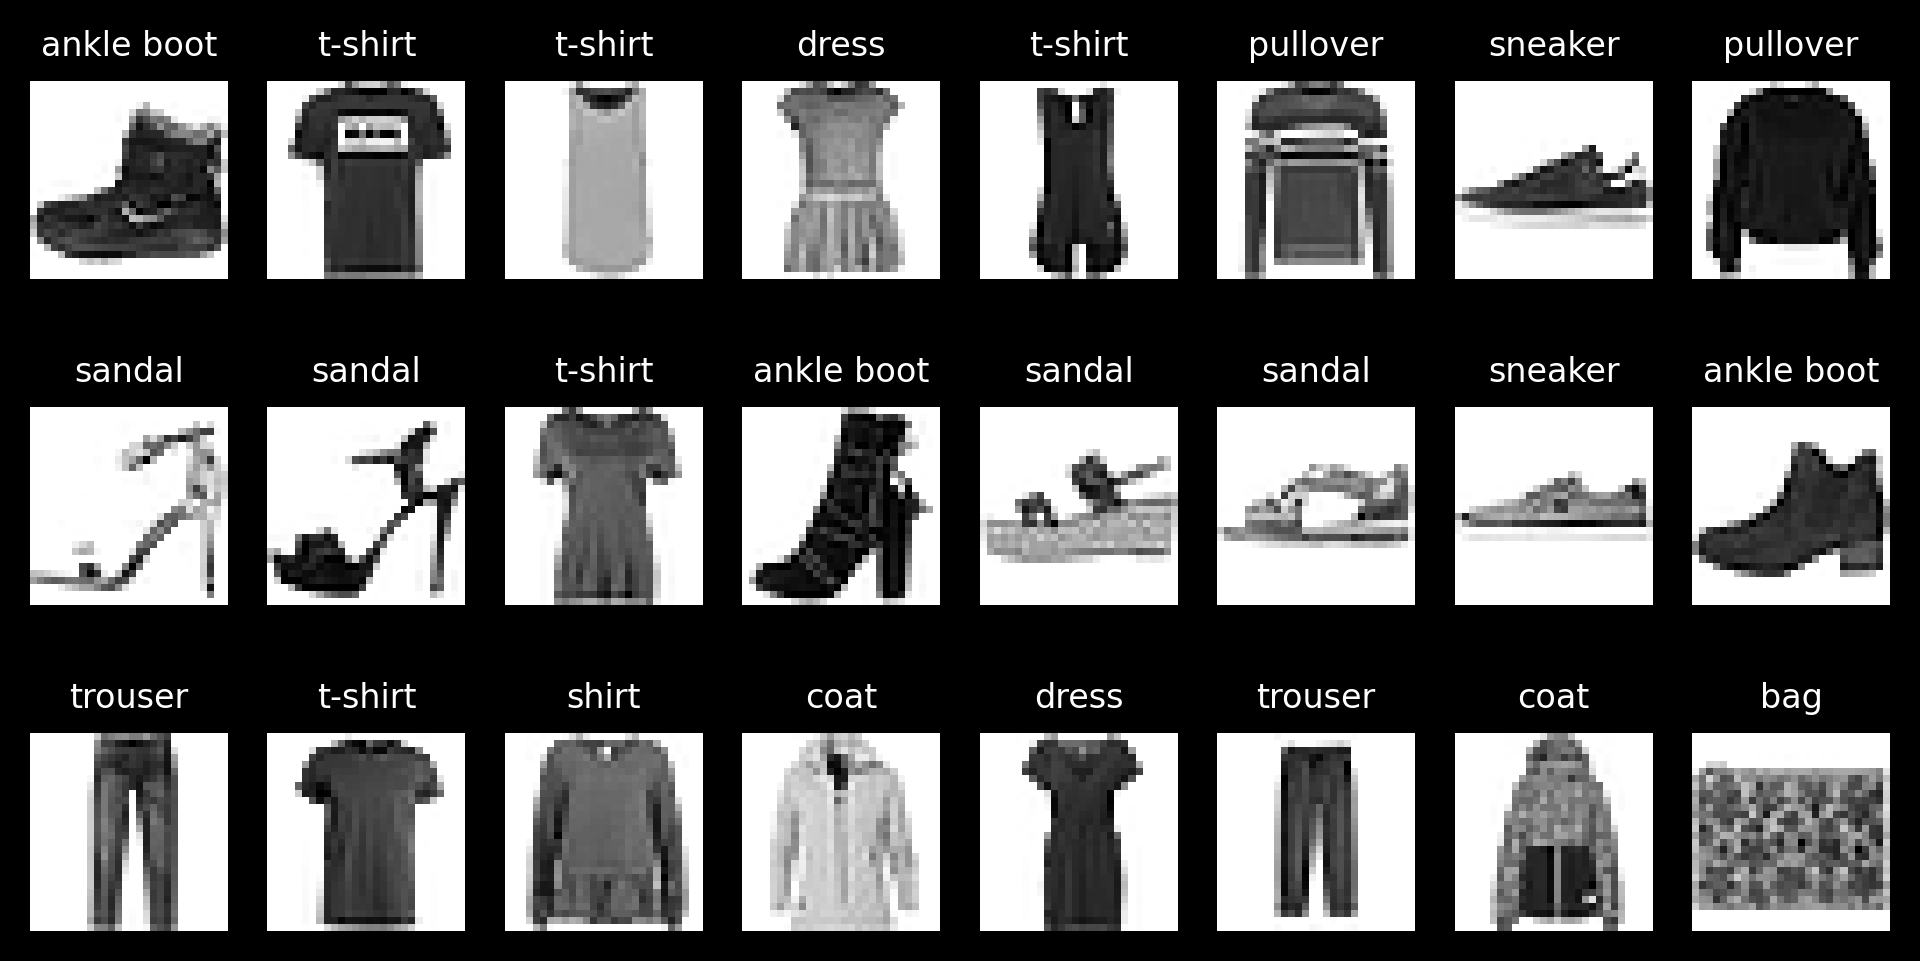

In [6]:
plt.figure(dpi=300, figsize=(8, 4))
for i in range(24):
    ax = plt.subplot(3, 8, i + 1)
    img = train_set[i][0]
    img = img / 2 + 0.5
    img = img.reshape(28, 28)
    plt.imshow(img, cmap="binary")
    plt.axis("off")
    plt.title(text_labels[train_set[i][1]], fontsize=8)
plt.show()

In [7]:
binary_train_set = [x for x in train_set if x[1] in [0, 9]]
binary_test_set = [x for x in test_set if x[1] in [0, 9]]

In [8]:
batch_size = 64
binary_train_loader = torch.utils.data.DataLoader(
    binary_train_set, batch_size=batch_size, shuffle=True
)
binary_test_loader = torch.utils.data.DataLoader(
    binary_test_set, batch_size=batch_size, shuffle=True
)

In [17]:
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"

binary_model = nn.Sequential(
    nn.Linear(28 * 28, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 32),
    nn.ReLU(),
    nn.Linear(32, 1),
    nn.Dropout(p=0.25),
    nn.Sigmoid().to(device),
)
binary_model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=1, bias=True)
  (7): Dropout(p=0.25, inplace=False)
  (8): Sigmoid()
)

In [18]:
lr = 0.001
optimizer = torch.optim.Adam(binary_model.parameters(), lr=lr)
loss_fn = nn.BCELoss()

In [19]:
for i in range(50):
    tloss = 0
    for imgs, labels in binary_train_loader:
        imgs = imgs.reshape(-1, 28 * 28)
        imgs = imgs.to(device)
        labels = torch.FloatTensor([x if x == 0 else 1 for x in labels])
        labels = labels.reshape(-1, 1).to(device)
        preds = binary_model(imgs)
        loss = loss_fn(preds, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        tloss += loss.detach()
    tloss = tloss / 50
    print(f"at epoch {i}, the losss is {tloss}")

at epoch 0, the losss is 0.7195724844932556
at epoch 1, the losss is 0.6575528383255005
at epoch 2, the losss is 0.6641812920570374
at epoch 3, the losss is 0.6591644287109375
at epoch 4, the losss is 0.652251124382019
at epoch 5, the losss is 0.6685429811477661
at epoch 6, the losss is 0.6589492559432983
at epoch 7, the losss is 0.6485040783882141
at epoch 8, the losss is 0.6546474099159241
at epoch 9, the losss is 0.6622524261474609
at epoch 10, the losss is 0.6515860557556152
at epoch 11, the losss is 0.6428217887878418
at epoch 12, the losss is 0.6502525210380554
at epoch 13, the losss is 0.6616482138633728
at epoch 14, the losss is 0.6578871011734009
at epoch 15, the losss is 0.65655517578125
at epoch 16, the losss is 0.6665135025978088
at epoch 17, the losss is 0.6476668119430542
at epoch 18, the losss is 0.6591452360153198
at epoch 19, the losss is 0.6444146037101746
at epoch 20, the losss is 0.6602261066436768
at epoch 21, the losss is 0.6688913702964783
at epoch 22, the losss 

In [21]:
import numpy as np

results = []
for imgs, labels in binary_test_loader:
    imgs = imgs.reshape(-1, 28 * 28).to(device)
    labels = (labels / 9).reshape(-1, 1).to(device)
    preds = binary_model(imgs)
    pred10 = torch.where(preds > 0.5, 1, 0)
    correct = pred10 == labels
    results.append(correct.detach().cpu().numpy().mean())
accuracy = np.array(results).mean()
print(f"The accuracy of the predictions is {accuracy}")


The accuracy of the predictions is 0.87841796875


## MultiCategory Classification 


In [24]:
train_set,val_set = torch.utils.data.random_split(train_set,[50_000,10_000])


ValueError: Sum of input lengths does not equal the length of the input dataset!

In [25]:
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True)


In [26]:
class EarlyStop:
    def __init__(self, patience=10):
        self.patience = patience
        self.steps = 0
        self.min_loss = float("inf")

    def stop(self, val_loss):
        if val_loss < self.min_loss:
            self.min_loss = val_loss
            self.steps = 0
        elif val_loss >= self.min_loss:
            self.steps += 1
        if self.steps >= self.patience:
            return True
        else:
            return False

In [33]:
stopper = EarlyStop()

In [34]:
model = nn.Sequential(
    nn.Linear(28 * 28, 256),
    nn.ReLU(),
    nn.Linear(256, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
).to(device)


In [35]:
lr=0.001 
optimizer=torch.optim.Adam(model.parameters(),lr=lr) 
loss_fn=nn.CrossEntropyLoss()

In [36]:
def train_epoch(): 
    tloss=0 
    for n,(imgs,labels) in enumerate(train_loader): 
        imgs=imgs.reshape(-1,28*28).to(device) 
        labels=labels.reshape(-1,).to(device) 
        preds=model(imgs) 
        loss=loss_fn(preds,labels) 
        optimizer.zero_grad() 
        loss.backward() 
        optimizer.step() 
        tloss+=loss.detach() 
        return tloss/n

In [37]:
def val_epoch():
    vloss = 0
    for n, (imgs, labels) in enumerate(val_loader):
        imgs = imgs.reshape(-1, 28 * 28).to(device)
        labels = labels.reshape(
            -1,
        ).to(device)
        preds = model(imgs)
        loss = loss_fn(preds, labels)
        vloss += loss.detach()
    return vloss / n

In [38]:
for i in range(1, 101):
    tloss = train_epoch()
    vloss = val_epoch()
    print(f"At epoch {i}, tloss is {tloss}, vloss is {vloss}")
    if stopper.stop(vloss) == True:
        break

At epoch 1, tloss is inf, vloss is 2.2846477031707764
At epoch 2, tloss is inf, vloss is 2.246267795562744
At epoch 3, tloss is inf, vloss is 2.196441411972046
At epoch 4, tloss is inf, vloss is 2.13537335395813
At epoch 5, tloss is inf, vloss is 2.065800905227661
At epoch 6, tloss is inf, vloss is 1.9906255006790161
At epoch 7, tloss is inf, vloss is 1.9082012176513672
At epoch 8, tloss is inf, vloss is 1.8183456659317017
At epoch 9, tloss is inf, vloss is 1.7270324230194092
At epoch 10, tloss is inf, vloss is 1.6312090158462524
At epoch 11, tloss is inf, vloss is 1.5376094579696655
At epoch 12, tloss is inf, vloss is 1.4653688669204712
At epoch 13, tloss is inf, vloss is 1.4096221923828125
At epoch 14, tloss is inf, vloss is 1.3428641557693481
At epoch 15, tloss is inf, vloss is 1.26960027217865
At epoch 16, tloss is inf, vloss is 1.234358549118042
At epoch 17, tloss is inf, vloss is 1.205627202987671
At epoch 18, tloss is inf, vloss is 1.1553161144256592
At epoch 19, tloss is inf, v

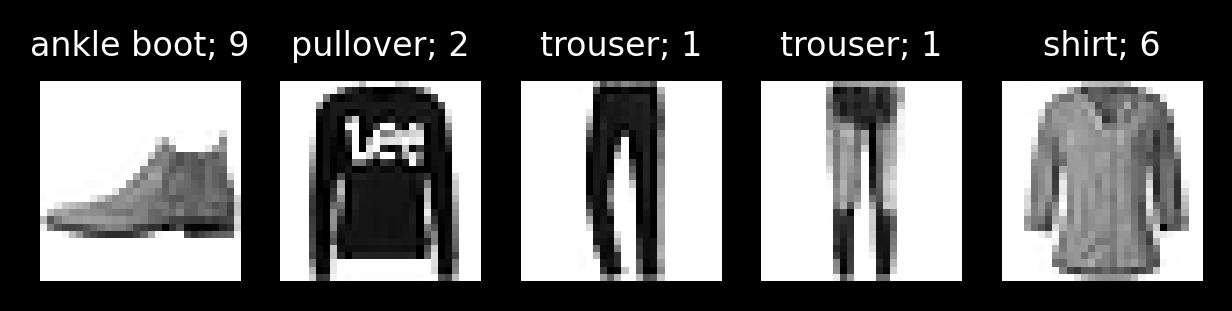

the label is 9; the prediction is 7
the label is 2; the prediction is 2
the label is 1; the prediction is 1
the label is 1; the prediction is 1
the label is 6; the prediction is 6


In [39]:
plt.figure(dpi=300, figsize=(5, 1))
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    img = test_set[i][0]
    label = test_set[i][1]
    img = img / 2 + 0.5
    img = img.reshape(28, 28)
    plt.imshow(img, cmap="binary")
    plt.axis("off")
    plt.title(text_labels[label] + f"; {label}", fontsize=8)
plt.show()
for i in range(5):
    img, label = test_set[i]
    img = img.reshape(-1, 28 * 28).to(device)
    pred = model(img)
    index_pred = torch.argmax(pred, dim=1)
    idx = index_pred.item()
    print(f"the label is {label}; the prediction is {idx}")


In [40]:
import numpy as np

results = []

for imgs, labels in test_loader:
    imgs = imgs.reshape(-1, 28 * 28).to(device)
    labels = (
        (labels)
        .reshape(
            -1,
        )
        .to(device)
    )
    preds = model(imgs)
    pred10 = torch.argmax(preds, dim=1)
    correct = pred10 == labels
    results.append(correct.detach().cpu().numpy().mean())

accuracy = np.array(results).mean()

print(f"the accuracy of the predictions is {accuracy}")


the accuracy of the predictions is 0.7211385350318471
